In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.datasets import make_moons, make_circles, make_classification

In [27]:
N = 150
noises = 0.05
random_state = 42

X_circle,y_circle = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )

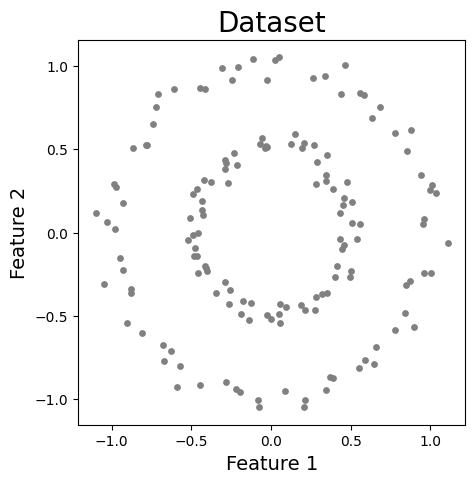

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X_circle[:,0],X_circle[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


link = linkage(X_circle, 'ward', 'euclidean')
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(149, 4)


In [9]:

complete_clustering = linkage(X_circle, method="complete", metric="euclidean")
average_clustering = linkage(X_circle, method="average", metric="euclidean")
single_clustering = linkage(X_circle, method="single", metric="euclidean")


#average_linkage

In [16]:
y_circle

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [23]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(X_circle, linkagefun=lambda x: average_clustering,
                                                          color_threshold = 1.2,
                                                          labels= y_circle)
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [26]:
# Determine clusters using a distance threshold (you can adjust 't' value based on dendrogram)
clusters = fcluster(average_clustering, t=1.2, criterion='distance')

# Plot the circular data with cluster assignments
fig_clusters = px.scatter(x=X_circle[:, 0],
                          y=X_circle[:, 1],
                          color=clusters.astype(str),  # Color points by cluster
                          title="Circular Data with Hierarchical Clustering (Average Linkage)",
                          labels={'x': 'X-axis', 'y': 'Y-axis'},
                          width=600, height=600)

# Customize the plot appearance
fig_clusters.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig_clusters.update_layout(showlegend=True)

# Display the plot
fig_clusters.show()

#complete_linkage

In [42]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(X_circle, linkagefun=lambda x: complete_clustering,
                                                          color_threshold = 2.21,
                                                          labels= y_circle)
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [44]:
# Determine clusters using a distance threshold (you can adjust 't' value based on dendrogram)
clusters = fcluster(complete_clustering, t=2.21, criterion='distance')

# Plot the circular data with cluster assignments
fig_clusters = px.scatter(x=X_circle[:, 0],
                          y=X_circle[:, 1],
                          color=clusters.astype(str),  # Color points by cluster
                          title="Circular Data with Hierarchical Clustering (complete Linkage)",
                          labels={'x': 'X-axis', 'y': 'Y-axis'},
                          width=600, height=600)

# Customize the plot appearance
fig_clusters.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig_clusters.update_layout(showlegend=True)

# Display the plot
fig_clusters.show()

#single_linkage

In [48]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(X_circle, linkagefun=lambda x: single_clustering,
                                                          color_threshold = 0.25,
                                                          labels= y_circle)
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [50]:
# Determine clusters using a distance threshold (you can adjust 't' value based on dendrogram)
clusters = fcluster(single_clustering, t=0.25, criterion='distance')

# Plot the circular data with cluster assignments
fig_clusters = px.scatter(x=X_circle[:, 0],
                          y=X_circle[:, 1],
                          color=clusters.astype(str),  # Color points by cluster
                          title="Circular Data with Hierarchical Clustering (Single Linkage)",
                          labels={'x': 'X-axis', 'y': 'Y-axis'},
                          width=600, height=600)

# Customize the plot appearance
fig_clusters.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig_clusters.update_layout(showlegend=True)

# Display the plot
fig_clusters.show()